In [2]:
import pandas as pd
import numpy as np

In [3]:
wine_df = pd.read_csv('winequality-red.csv', sep=';')
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# Raw Data Visualization

# Data Processing

<function matplotlib.pyplot.show(close=None, block=None)>

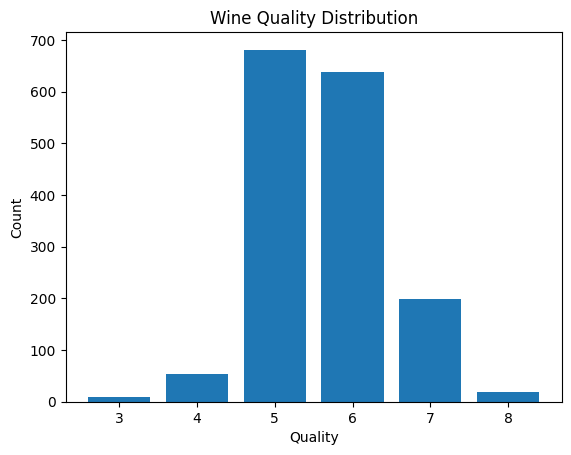

In [8]:
import matplotlib.pyplot as plt

# Count values
quality_counts = wine_df['quality'].value_counts().sort_index()

# Plot bar chart

plt.bar(quality_counts.index, quality_counts.values)

# Labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')

# Show plot
plt.show




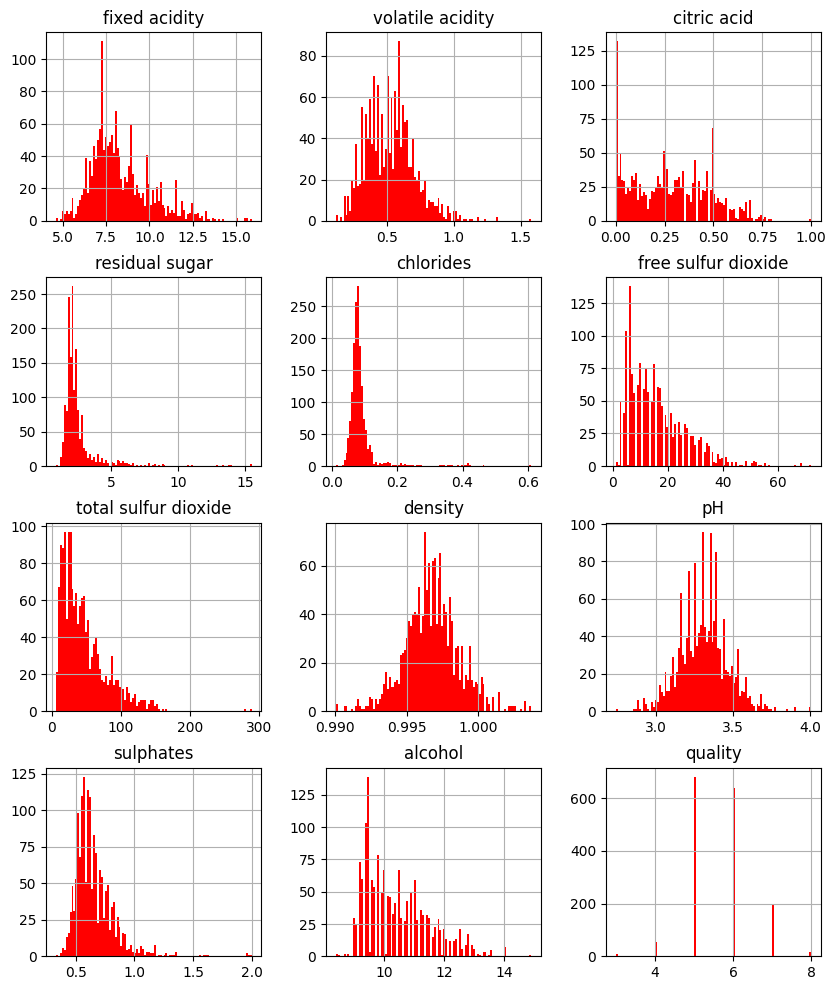

In [9]:
wine_df.hist(bins = 100, figsize = (10,12), color='red')
plt.show()

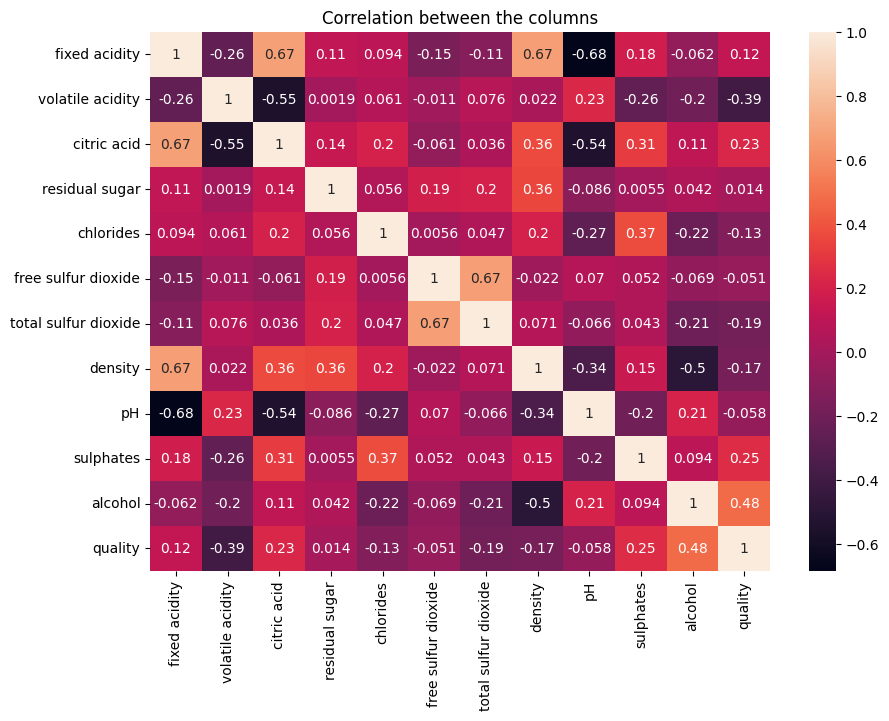

In [10]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [11]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)


In [12]:
wine_df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [13]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


# Model Training 

In [16]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 86.46%


In [17]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.53      0.25      0.34        67

    accuracy                           0.86       480
   macro avg       0.71      0.61      0.63       480
weighted avg       0.84      0.86      0.84       480



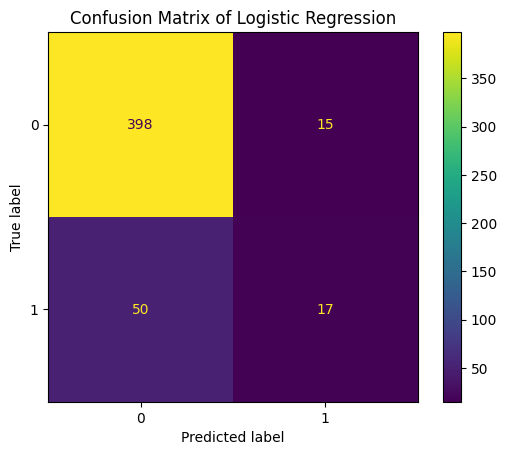

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, logreg_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 89.38%


In [21]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       413
           1       0.65      0.51      0.57        67

    accuracy                           0.89       480
   macro avg       0.79      0.73      0.76       480
weighted avg       0.89      0.89      0.89       480



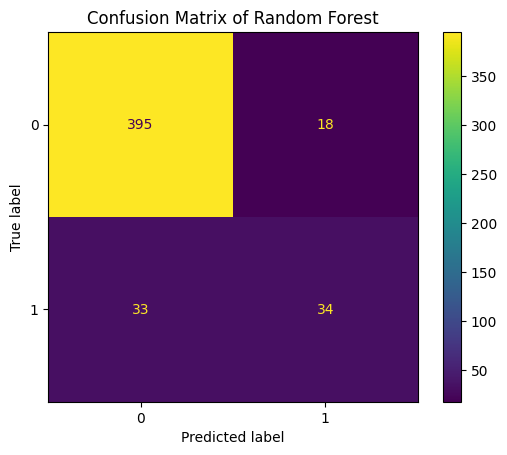

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rforest_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random Forest")
plt.show()


# SVM model

In [23]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("Test accuracy: {:.2f}%".format(svm_acc * 100))

Test accuracy: 86.25%


In [24]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       413
           1       1.00      0.01      0.03        67

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.80       480



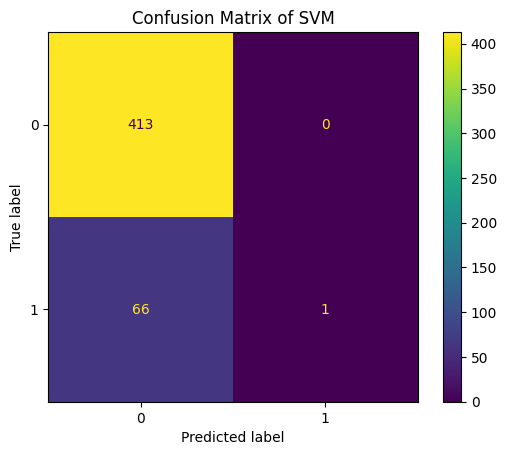

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, svm_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of SVM")
plt.show()


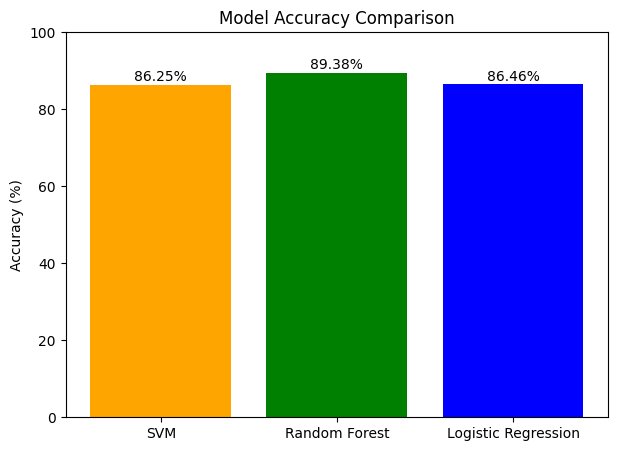

In [31]:
models = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [ svm_acc * 100,rforest_acc * 100,logreg_acc * 100]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies, color=['orange', 'green', 'blue'])

plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 1,
             f'{height:.2f}%',
             ha='center',
             fontsize=10)
plt.show()
